In [619]:
%pylab nbagg

Populating the interactive namespace from numpy and matplotlib


# Explore MARSS type simulations in python
## First step is to define a few parameters fo the spin system
Define 3 spins at certain chemical shifts with some coupling between two of them


In [620]:
shifts = array([0,-2, 3])
#shifts = array([0,-2])
#shifts = array([1])
nSpins = shifts.shape[0]

B0 = 3
GAMMA = 42.577E6
Omega = GAMMA*B0*1E-6* shifts
jcoupling = array([[0,10,0],[10,0,0],[0,0,0]])
#jcoupling =  array([[0,10],[10,0]])
#jcoupling =  array([[0,0],[0,0]])
#jcoupling = zeros((1,1))
print(Omega)
print(jcoupling)

[   0.   -255.46  383.19]
[[ 0 10  0]
 [10  0  0]
 [ 0  0  0]]


## Construct the basic operators Ix,Iy,Iz for the system

In [621]:
def kronInOrder(matList):
    if len(matList)==1:
        return matList[0]
    
    out = kron(matList[0],matList[1])
    for m in matList[2:]:
        out = kron(out,m)
    return out
    
def singleIz():
    return 0.5*array([[1,0],[0,-1]])

def singleIx():
    return 0.5*array([[0,1],[1,0]])

def singleIy():
    return (1/(2j))*array([[0,1],[-1,0]])

def createIz(nspins):
    # Take
    AllIz = []
    for iDx in range(0,nspins):
        currentOps = []
        for jDx in range(0,nspins):
            if iDx == jDx:
                currentOps.append(singleIz())
            else:
                currentOps.append(eye(2))
        AllIz.append(kronInOrder(currentOps))
    
    return AllIz

def createIx(nspins):
    # Take
    AllIx = []
    for iDx in range(0,nspins):
        currentOps = []
        for jDx in range(0,nspins):
            if iDx == jDx:
                currentOps.append(singleIx())
            else:
                currentOps.append(eye(2))
        AllIx.append(kronInOrder(currentOps))
    
    return AllIx

def createIy(nspins):
    # Take
    AllIy = []
    for iDx in range(0,nspins):
        currentOps = []
        for jDx in range(0,nspins):
            if iDx == jDx:
                currentOps.append(singleIy())
            else:
                currentOps.append(eye(2))
        AllIy.append(kronInOrder(currentOps))
    
    return AllIy

In [622]:
Izs = createIz(nSpins)
Ixs = createIx(nSpins)
Iys = createIy(nSpins)
print(Iys[0])
print(Ixs[-1])
print((1/(2j)))

[[0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.5j 0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.5j 0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.5j 0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.-0.5j]
 [0.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j ]
 [0.+0.j  0.+0.j  0.+0.j  0.+0.5j 0.+0.j  0.+0.j  0.+0.j  0.+0.j ]]
[[0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.  0.  0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.5 0. ]]
-0.5j


## Construct the chemical shift and j coupling part of the hamiltonian

In [641]:
# chemical shift
Hcs = Omega[0] * Izs[0]
for om,iz in zip(Omega[1:],Izs[1:]):
    Hcs += om * iz
# print(Hcs)

# j coupling
Hj = zeros(Izs[0].shape,dtype = np.complex128)
for iDx in range(0,jcoupling.shape[0]):
    for jDx in range(iDx+1,jcoupling.shape[1]):        
        if jcoupling[iDx,jDx] != 0:
            # Calculate the j-coupling terms I[iDx].I[jDx] = IixIjx + IiyIjy + IizIjz
            # This is the scalar product, so normal matrix multiplication not direct (kroneker) product
            print(f'{iDx},{jDx} = {jcoupling[iDx,jDx]}')
            #Hj += jcoupling[iDx,jDx]*(Ixs[iDx]@Ixs[jDx]+Iys[iDx]@Iys[jDx]+Izs[iDx]@Izs[jDx])
            Hj += jcoupling[iDx,jDx]*(Izs[iDx]@Izs[jDx]) # Secular approximation
# print(Hj)
# print(Hcs+Hj)

0,1 = 10


## Construct the thermal equilibrium state

In [624]:
peq = numpy 
print(peq)

[[ 1.5  0.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.5  0.   0.   0.   0.   0.   0. ]
 [ 0.   0.   0.5  0.   0.   0.   0.   0. ]
 [ 0.   0.   0.  -0.5  0.   0.   0.   0. ]
 [ 0.   0.   0.   0.   0.5  0.   0.   0. ]
 [ 0.   0.   0.   0.   0.  -0.5  0.   0. ]
 [ 0.   0.   0.   0.   0.   0.  -0.5  0. ]
 [ 0.   0.   0.   0.   0.   0.   0.  -1.5]]


## Define operator exponential function

In [625]:
# See page 138 of Levvit Spin Dynamics.
# exp(A) is not equal to the exponential of each element of A!

def diagOpExp(op):
    # calculate the exponential of a diagonal operator
    return np.diag(np.exp(np.diagonal(op)))

def diagonaliseMat(op):
    w,v = numpy.linalg.eig(op)
    D = diag(w)
    X = v
    if np.array_equal(op,op.conj().T) & (norm(v,axis=0)==1).all():
        Xp = X.conj().T
    else:
        Xp = inv(X)
    return X,D,Xp

def opExp(op):
    if count_nonzero(op - diag(diagonal(op)))==0:
        #print('is diagonal')
        out = diagOpExp(op)
    else:
        #print('is not diagonal')
        # Diagonalise the matrix first
        X,D,Xp = diagonaliseMat(op)
        out = X@diagOpExp(D)@Xp
        
    return out

# aa = np.diag([1,1])
# aa = diag(np.random.rand(2)) + diag(1j*np.random.rand(2))
# print(aa)
# expaa = opExp(aa)
# print(expaa)



## At this point test using a PI/2 pulse to see if we observe the signal

In [626]:
def createRFHamiltonian(pulseAmp,pulsePhs,Ixs,Iys):
    Hrf = []
    for amp,phs in nditer((pulseAmp,pulsePhs)):        
        Hrf.append(amp*numpy.sum(Ixs*array(cos(phs)) + Iys*array(sin(phs)),0)) # require array for multiplication with list to work

    return Hrf

pulseDur = 0.25E-3 #0.25 ms
fa = 90
pulseAmp = 500 * (1E-3/pulseDur) * (fa/180)
pulsePhase = 0; #radians
print(pulseAmp)

steps = 50 #10 us steps
timeStep = pulseDur/steps
pulseAmp = full(steps,pulseAmp)
pulsePhs = full(steps,pulsePhase)

Hrf1 = createRFHamiltonian(pulseAmp,pulsePhs,Ixs,Iys)

# Form propagator
# Integrate over time
prop = opExp(-1j*timeStep*2*pi*numpy.sum(Hcs+Hj+Hrf1,0)) # 2pi to convert to radians

set_printoptions(precision=2,linewidth=210)

pPostRf = prop@peq@prop.conj().T

# print(peq)
# print(2*np.round(prop,decimals=1))
# print(2*np.round(prop.conj().T,decimals=1))
# # print(timeStep*numpy.sum(Hrf1,0))
# print(np.round(pPostRf,decimals=1))


1000.0


## Detection operator function + RO event

In [627]:
from copy import deepcopy
%set_env PYTHONBREAKPOINT=IPython.core.debugger.set_trace
def detect(p,Ixs,Iys):
    #breakpoint()
    #print(p)
    S = trace((Ixs[0]+1j*Iys[0])@p)
    for ix,iy in zip(Ixs[1:],Iys[1:]):
        S += trace((ix+1j*iy)@p)
    N = len(Ixs)
    S*= 1/(2**(N-2))
    return S

def readout(p,Hfe,Ixs,Iys,steps,dwellTime,lw):
    St = []
    #print(p)
    pcurr = deepcopy(p)
    #breakpoint()
    prop = opExp(-1j*dwellTime*2*pi*Hfe)
    #print(prop)
    for idx in range(0,steps):        
        St.append(detect(pcurr,Ixs,Iys))
        pcurr = prop@pcurr@prop.conj().T
        
    # Construct associated time and frequency axis
    ax = {}
    ax.update({'time':dwellTime*numpy.arange(0,steps)})
    bw = 1/dwellTime
    ax.update({'freq':numpy.linspace(-bw/2,bw/2,steps)})
    
    # Apply damping
    tconst = 1/(pi*lw)
    St *= exp(-ax['time']/tconst)
    
    return array(St),ax

env: PYTHONBREAKPOINT=IPython.core.debugger.set_trace


<IPython.core.display.Javascript object>


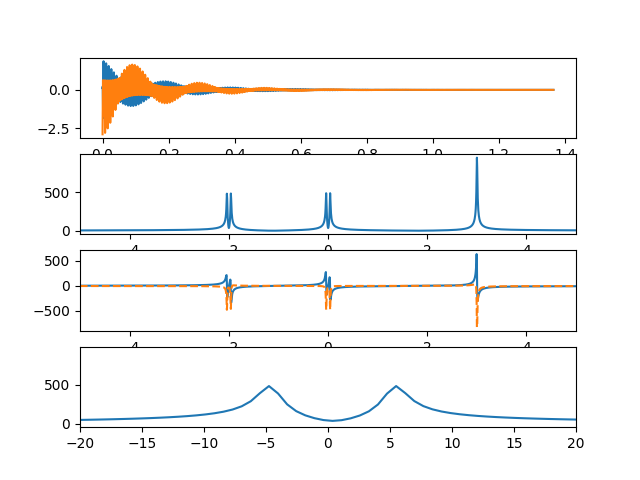

(-20, 20)

In [628]:
ADCSteps = 2*4096;
ADCBW = 6000
ADCDwellTime = 1/ADCBW

S,ax = readout(pPostRf,Hcs+Hj,Ixs,Iys,ADCSteps,ADCDwellTime,2)

ax.update({'ppm':ax['freq']/(GAMMA*B0*1E-6)})
fig, (ax1, ax2, ax3, ax4)= plt.subplots(4,1)
ax1.plot(ax['time'],real(S))
ax1.plot(ax['time'],imag(S))
#plt.ylim([-100,100])
spec = np.fft.fftshift(np.fft.fft(S))
ax2.plot(ax['ppm'],abs(spec))
ax3.set_xlim([-5,5])
ax3.plot(ax['ppm'],real(spec))
ax3.plot(ax['ppm'],imag(spec),'--')
ax2.set_xlim([-5,5])
ax4.plot(ax['freq'],abs(exp(1j*(pi/180)*90)*spec))
ax4.set_xlim([-20,20])

## Now do two pi pulses with delays to perform an unlocalised PRESS experiment

### Describe pulse(s)

In [629]:
pulseDur = 0.25E-3 #0.5 ms
fa = 180
pulseAmp = 500 * (1E-3/pulseDur) * (fa/180)
pulsePhase = 0; #radians
print(pulseAmp)

steps = 50 #10 us steps
timeStep = pulseDur/steps
pulseAmp = full(steps,pulseAmp)
pulsePhs = full(steps,pulsePhase)

Hrf2 = createRFHamiltonian(pulseAmp,pulsePhs,Ixs,Iys)
Hrf3 = createRFHamiltonian(pulseAmp,pulsePhs,Ixs,Iys)

2000.0


### Free evolution function

In [630]:
def freeEvolution(p,Hcs,Hj,time,Hg = 0):
    prop = opExp(-1j*time*2*pi*(Hcs+Hj+Hg))
    return prop@p@prop.conj().T

### Apply RF propagator 

In [631]:
def applyRF(p,Hcs,Hj,Hrf,pulseTimeStep,Hg = 0):
    combH = Hcs+Hj+Hrf+Hg
    prop = opExp(-1j*pulseTimeStep*2*pi*combH[0])
    for cH in combH[1:]:
        prop = opExp(-1j*pulseTimeStep*2*pi*cH)@prop
    
    #prop = opExp(-1j*pulseTimeStep*2*pi*numpy.sum(Hcs+Hj+Hrf+Hg,0)) # 2pi to convert to radians
    return prop@p@prop.conj().T

### First without coherence selection


<IPython.core.display.Javascript object>


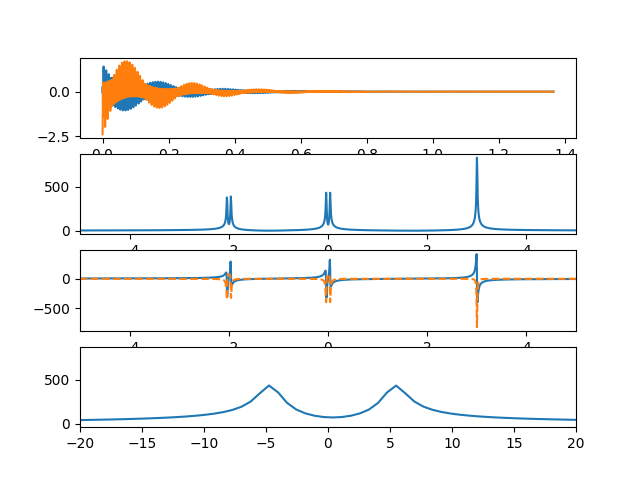

(-20, 20)

In [632]:
prop = opExp(-1j*timeStep*2*pi*numpy.sum(Hcs+Hj+Hrf1,0)) # 2pi to convert to radians

TE1 = 10E-3
TE2 = 10E-3
timeGap1 = TE1/2 - pulseDur #2x half pulse duration
timeGap2 = (TE1/2 - pulseDur/2)+(TE2/2 - pulseDur/2)
timeGap3 = TE2/2 - pulseDur/2

p = freeEvolution(pPostRf,Hcs,Hj,timeGap1)
p = applyRF(p,Hcs,Hj,Hrf2,timeStep)
p = freeEvolution(p,Hcs,Hj,timeGap2)
p = applyRF(p,Hcs,Hj,Hrf3,timeStep)
p = freeEvolution(p,Hcs,Hj,timeGap3)

S2,_ = readout(p,Hcs+Hj,Ixs,Iys,ADCSteps,ADCDwellTime,2)

fig, (ax1, ax2, ax3, ax4)= plt.subplots(4,1)
ax1.plot(ax['time'],real(S2))
ax1.plot(ax['time'],imag(S2))
#plt.ylim([-100,100])
spec2 = np.fft.fftshift(np.fft.fft(S2))
ax2.plot(ax['ppm'],abs(spec2))
ax3.set_xlim([-5,5])
ax3.plot(ax['ppm'],real(spec2))
ax3.plot(ax['ppm'],imag(spec2),'--')
ax2.set_xlim([-5,5])
ax4.plot(ax['freq'],abs(exp(1j*(pi/180)*90)*spec2))
ax4.set_xlim([-20,20])

### With coherence selection

In [633]:
def getorders(nspins):
    matList = []
    for idx in range(0,nspins):
        matList.append(np.array([[0,1],[-1,0]]))
    mat1 = matList[0]
    out = mat1
    for sDx in range(1,len(matList)):
        mat2 = matList[sDx]
        out = np.tile(b,mat1.shape)
        toBlock = []
        for iDx in range(0,mat1.shape[1]):
            currLine = []
            for jDx in range(0,mat1.shape[0]):
                currLine.append(np.full(mat2.shape,mat1[iDx,jDx]))
            toBlock.append(currLine)

        blockMat = np.block(toBlock)
        out +=blockMat
        mat1 = out
        
    return out

def selectCoherence(p,order,nspins):
    # Construct filter matrix
    F = getorders(nspins)
#     print(F)
    F[F!=order] = 0
    F[F==order] = 1
#     print(F)
    # Apply filter
    p = F*p # Element wise multiplication
    return p

<IPython.core.display.Javascript object>


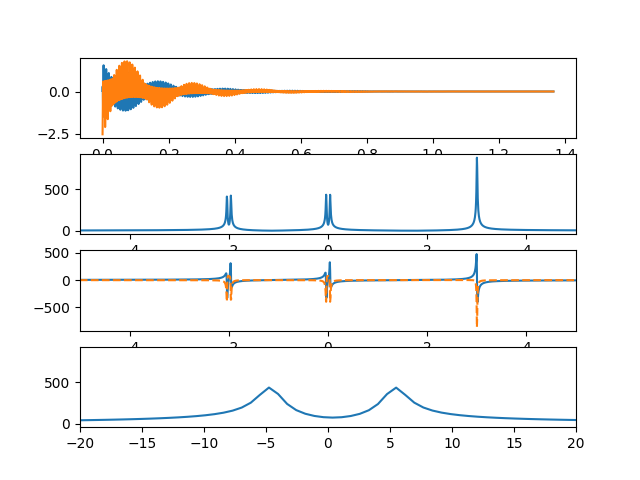

(-20, 20)

In [634]:
p = selectCoherence(pPostRf,-1,nSpins)
p = freeEvolution(p,Hcs,Hj,timeGap1)
p = applyRF(p,Hcs,Hj,Hrf2,timeStep)
p = selectCoherence(p,1,nSpins)
p = freeEvolution(p,Hcs,Hj,timeGap2)
p = applyRF(p,Hcs,Hj,Hrf3,timeStep)
p = selectCoherence(p,-1,nSpins)
p = freeEvolution(p,Hcs,Hj,timeGap3)

S2,_ = readout(p,Hcs+Hj,Ixs,Iys,ADCSteps,ADCDwellTime,2)

fig, (ax1, ax2, ax3, ax4)= plt.subplots(4,1)
ax1.plot(ax['time'],real(S2))
ax1.plot(ax['time'],imag(S2))
#plt.ylim([-100,100])
spec2 = np.fft.fftshift(np.fft.fft(S2))
ax2.plot(ax['ppm'],abs(spec2))
ax3.set_xlim([-5,5])
ax3.plot(ax['ppm'],real(spec2))
ax3.plot(ax['ppm'],imag(spec2),'--')
ax2.set_xlim([-5,5])
ax4.plot(ax['freq'],abs(exp(1j*(pi/180)*90)*spec2))
ax4.set_xlim([-20,20])

## Gradient terms

In [635]:
def createGradHamiltonian(G,r,Izs,gamma=42.577E6):
    
    H = gamma*G@r*Izs[0]
    for iz in Izs[1:]:
        H += gamma*G@r*iz
    
    return H

### Test a slice selective pulse

Pulse time = 0.006s, 200 steps, 3e-05 step time
679.6908543163082


<IPython.core.display.Javascript object>


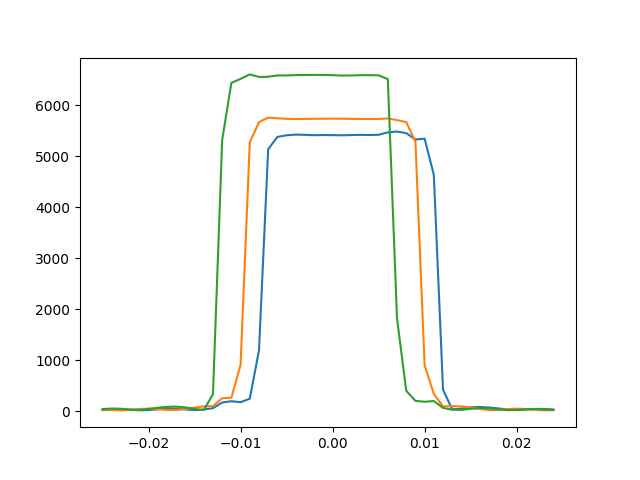

In [639]:
import scipy.io

matload = scipy.io.loadmat('/Users/wclarke/Documents/MATLAB/SpectroscopySimulation/basisGeneration/sequences/sead_uzay_gui_7T/asym_90exc')

origpulse = matload['asym_90exc_complexAmp']
pulse = np.interp(np.arange(0,1000,5), np.arange(0,1000), origpulse[:,0])
pulse /= np.max(pulse)
pulse_time=6e-3
pulseSteps = pulse.shape[0]
shapedTimeStep = pulse_time/pulseSteps
print(f'Pulse time = {pulse_time}s, {pulseSteps} steps, {shapedTimeStep} step time')
pulseInt = np.sum(np.real(pulse))/pulseSteps
targetFA = 90
pulse_frq=0
pulse_pwr=500*(targetFA/180)*(1E-3/pulse_time)*(1/pulseInt)
print(pulse_pwr)
# fig,ax = plt.subplots(1,1)
# #ax.plot(abs(origpulse))
# ax.plot(real(origpulse))
# #ax.plot(abs(origpulse))
# ax.plot(np.arange(0,1000,2),real(pulse),'--')
HrfShaped = createRFHamiltonian(pulse_pwr*np.abs(pulse),np.angle(pulse),Ixs,Iys)

# Gradient vector
gradShaped = np.array([0.00319,0,0]) #in T/m

# position vector 
posVec = np.arange(-0.025,0.025,0.001)
posVec = np.stack([posVec,np.zeros(posVec.shape),np.zeros(posVec.shape)],axis=1)

# Loop over position vector
SShaped = []
ADCSteps = 4096;
ADCBW = 6000
ADCDwellTime = 1/ADCBW

for r in posVec:
    Hg = createGradHamiltonian(gradShaped,r,Izs)
    ptmp = applyRF(peq,Hcs,Hj,HrfShaped,shapedTimeStep,Hg)
    ptmp = selectCoherence(ptmp,-1,nSpins)
    stmp,_ = readout(ptmp,Hcs+Hj,Ixs,Iys,ADCSteps,ADCDwellTime,2)
    spectmp = np.fft.fftshift(np.fft.fft(stmp))
    SShaped.append(spectmp)

profile = []
# indicies = []
# for pDx in range(0,nSpins):
profile.append([np.sum(np.abs(i[1800:1900])) for i in SShaped])
profile.append([np.sum(np.abs(i[2000:2100])) for i in SShaped])
profile.append([np.sum(np.abs(i[2250:2350])) for i in SShaped])

fig,ax = plt.subplots(1,1)    
#ax.plot(np.abs(SShaped[0]))
ax.plot(posVec[:,0],profile[0])
ax.plot(posVec[:,0],profile[1])
ax.plot(posVec[:,0],profile[2])
# SShaped = np.array(SShaped)
# fig,ax = plt.subplots(1,1)
# ax.plot(posVec[:,0],np.abs(SShaped))
# ax.plot(posVec[:,0],np.real(SShaped))
# ax.plot(posVec[:,0],np.imag(SShaped))

In [648]:
from collections import namedtuple
Address = namedtuple('Address',['Number','Street','City','Occupants'])
Family = namedtuple('Family',['Mom','Dad','Child'])
F1 = Family('Lynn','Mark','Isaac')
A1 = Address(281,'Osler Road','Oxford',F1)
print(A1)
print(A1.Occupants)
print(A1.Occupants.Dad)

Address(Number=281, Street='Osler Road', City='Oxford', Occupants=Family(Mom='Lynn', Dad='Mark', Child='Isaac'))
Family(Mom='Lynn', Dad='Mark', Child='Isaac')
Mark
